In [3]:
from net.dpt import DepthAnythingV2, DINOv2
from net.model import AWR
import torch
import cv2

checkpoint = torch.load('ckpt/Dino/best.pth', map_location='cpu')
im_path = './test/dehaze/input/0001_0.8_0.2.jpg'
# im_path = './test/derain/input/1.png'
input = cv2.imread(im_path)

model = AWR(encoder='vits', features=64, out_channels=[48, 96, 192, 384], use_bn=False, use_clstoken=False)

model.load_state_dict(checkpoint['net'], strict=False)
model = model.cuda().eval()
input = cv2.imread(im_path)
output = model.infer_image(input)
print(output.shape)

usage: ipykernel_launcher.py [-h] [--cuda CUDA] [--epochs EPOCHS]
                             [--epochs_encoder EPOCHS_ENCODER] [--resume]
                             [--lr LR] [--de_type DE_TYPE]
                             [--patch_size PATCH_SIZE]
                             [--encoder_dim ENCODER_DIM]
                             [--num_workers NUM_WORKERS]
                             [--data_file_dir DATA_FILE_DIR]
                             [--denoise_dir DENOISE_DIR]
                             [--derain_dir DERAIN_DIR]
                             [--dehaze_dir DEHAZE_DIR]
                             [--output_path OUTPUT_PATH]
                             [--ckpt_path CKPT_PATH]
ipykernel_launcher.py: error: unrecognized arguments: --f=/home/hpnquoc/.local/share/jupyter/runtime/kernel-v2-2029303VPr8i4zAzf7d.json


SystemExit: 2

In [13]:
print(checkpoint['epoch'])

376


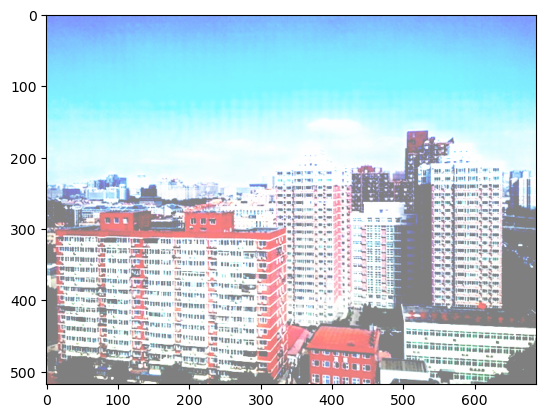

In [14]:
from matplotlib import pyplot as plt
plt.imshow(torch.from_numpy(output[0]).permute(1, 2, 0).detach().cpu().numpy())
plt.show()

In [ ]:
print(output.max(), output.min())
print(output.shape)

1.0 0.5
(1, 3, 518, 686)


In [ ]:
finetuned_dino = DINOv2('vits')

In [ ]:
finetuned_dino.load_state_dict(torch.load('/home/hpnquoc/testing/working/zoo/FiT3D/dinov2_small_finetuned.pth', map_location='cpu'))

In [ ]:
finetuned_dino = finetuned_dino.cuda().eval()
model.pretrained = finetuned_dino

In [ ]:
output = model.infer_image(input)

torch.Size([1, 2072, 384])
torch.Size([1, 384])
torch.Size([1, 2072, 384])
torch.Size([1, 384])
torch.Size([1, 2072, 384])
torch.Size([1, 384])
torch.Size([1, 2072, 384])
torch.Size([1, 384])
torch.Size([1, 48, 148, 224])
torch.Size([1, 96, 74, 112])
torch.Size([1, 192, 37, 56])
torch.Size([1, 384, 19, 28])


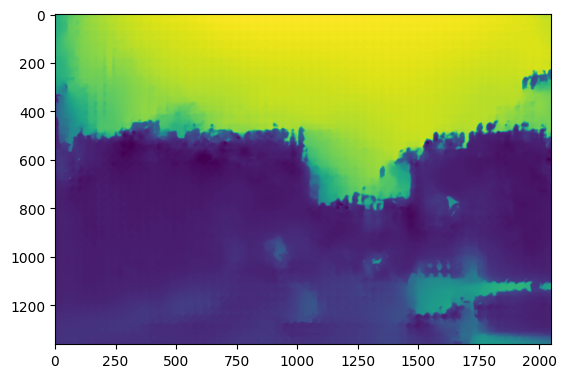

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(output)
plt.show()